In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [23]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
animes_df = pd.read_csv("./data/animes.csv")
animes_df.head(10)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
5,37510,Mob Psycho 100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","['Action', 'Slice of Life', 'Comedy', 'Superna...","Jan 7, 2019 to Apr 1, 2019",13.0,442310,176,21.0,8.89,https://cdn.myanimelist.net/images/anime/1918/...,https://myanimelist.net/anime/37510/Mob_Psycho...
6,199,Sen to Chihiro no Kamikakushi,"Stubborn, spoiled, and naïve, 10-year-old Chih...","['Adventure', 'Supernatural', 'Drama']","Jul 20, 2001",1.0,913212,40,20.0,8.90,https://cdn.myanimelist.net/images/anime/6/795...,https://myanimelist.net/anime/199/Sen_to_Chihi...
7,38000,Kimetsu no Yaiba,"Ever since the death of his father, the burden...","['Action', 'Demons', 'Historical', 'Shounen', ...","Apr 6, 2019 to Sep 28, 2019",26.0,575037,106,19.0,8.92,https://cdn.myanimelist.net/images/anime/1286/...,https://myanimelist.net/anime/38000/Kimetsu_no...
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,"['Mystery', 'Comedy', 'Supernatural', 'Vampire']","Aug 12, 2017 to Aug 13, 2017",7.0,189944,573,18.0,8.93,https://cdn.myanimelist.net/images/anime/6/873...,https://myanimelist.net/anime/35247/Owarimonog...
9,2904,Code Geass: Hangyaku no Lelouch R2,"One year has passed since the Black Rebellion,...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","Apr 6, 2008 to Sep 28, 2008",25.0,992196,27,17.0,8.93,https://cdn.myanimelist.net/images/anime/4/939...,https://myanimelist.net/anime/2904/Code_Geass_...


In [25]:
def get_sentiment(text):
    if not isinstance(text, str):
        text = ''
    return sid.polarity_scores(text)

sid = SentimentIntensityAnalyzer()

animes_df['synopsis'] = animes_df['synopsis'].fillna('')
animes_df['title_sentiment'] = animes_df['title'].apply(get_sentiment)
animes_df['synopsis_sentiment'] = animes_df['synopsis'].apply(get_sentiment)

animes_df[['title_neg', 'title_neu', 'title_pos', 'title_compound']] = animes_df['title_sentiment'].apply(pd.Series)
animes_df[['synopsis_neg', 'synopsis_neu', 'synopsis_pos', 'synopsis_compound']] = animes_df['synopsis_sentiment'].apply(pd.Series)

In [26]:
animes_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,title_sentiment,synopsis_sentiment,title_neg,title_neu,title_pos,title_compound,synopsis_neg,synopsis_neu,synopsis_pos,synopsis_compound
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.06, 'neu': 0.837, 'pos': 0.103, 'com...",0.000,1.000,0.0,0.000,0.060,0.837,0.103,0.7665
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...","{'neg': 0.031, 'neu': 0.814, 'pos': 0.155, 'co...",0.355,0.645,0.0,-0.296,0.031,0.814,0.155,0.9704
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.044, 'neu': 0.802, 'pos': 0.154, 'co...",0.000,1.000,0.0,0.000,0.044,0.802,0.154,0.9724
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.086, 'neu': 0.863, 'pos': 0.05, 'com...",0.000,1.000,0.0,0.000,0.086,0.863,0.050,-0.8201
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.087, 'neu': 0.754, 'pos': 0.159, 'co...",0.000,1.000,0.0,0.000,0.087,0.754,0.159,0.9390


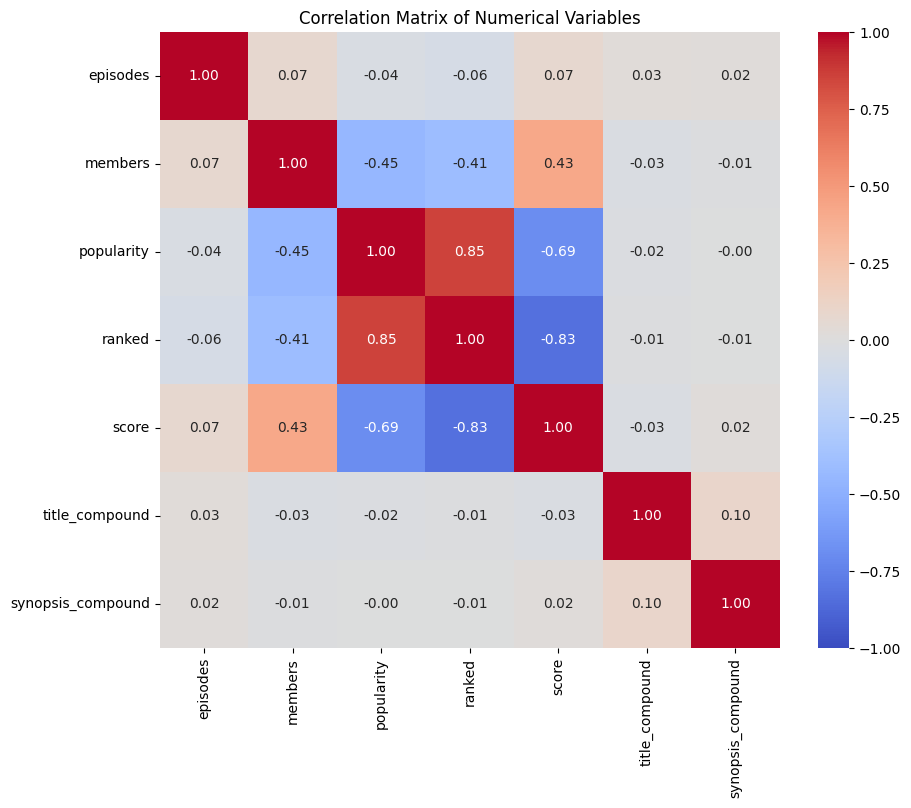

In [27]:
corr_matrix = animes_df[['episodes', 'members', 'popularity', 'ranked', 'score', 'title_compound', 'synopsis_compound']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [28]:
stop_words = set(stopwords.words('english'))
stop_words.add('anime')
animes_df['synopsis_clean'] = animes_df['synopsis'].str.replace('[Written by MAL Rewrite]', '', regex=False)

def preprocess(text):
    tokens = [word for word in nltk.word_tokenize(text.lower()) if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

animes_df['synopsis_tokens'] = animes_df['synopsis_clean'].apply(preprocess)
dictionary = corpora.Dictionary(animes_df['synopsis_tokens'])
corpus = [dictionary.doc2bow(text) for text in animes_df['synopsis_tokens']]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

In [30]:
def preprocess(text):
    tokens = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

animes_df['synopsis_clean'] = animes_df['synopsis_clean'].apply(preprocess)

def extract_keywords(text):
    if not text.strip():  # Check for empty or whitespace-only text
        return []
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    try:
        tfidf_matrix = vectorizer.fit_transform([text])
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = zip(feature_names, tfidf_matrix.toarray()[0])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords = [word for word, score in sorted_tfidf_scores[:10]]
        return top_keywords
    except ValueError:
        return []

animes_df['keywords'] = animes_df['synopsis_clean'].apply(extract_keywords)

animes_df[['title', 'synopsis_clean', 'keywords']].head(10)

,title,synopsis_clean,keywords
0,Haikyuu!! Second Season,following participation karasuno high school v...,"[volleyball, hope, karasuno, team, teams, old,..."
1,Shigatsu wa Kimi no Uso,music accompanies path human prodigious pianis...,"[kousei, music, accompanies, note, passing, pa..."
2,Made in Abyss,gaping chasm stretching depths filled mysterio...,"[chasm, come, mysterious, whistle, white, perm..."
3,Fullmetal Alchemist: Brotherhood,order something something equal value must alc...,"[alphonse, brothers, edward, colonel, equivale..."
4,Kizumonogatari III: Reiketsu-hen,helping revive legendary vampire koyomi ararag...,"[araragi, vampire, possible, turn, powerful, r..."
5,Mob Psycho 100 II,shigeo kageyama maturing understanding role su...,"[reigen, supernatural, mob, psychic, remains, ..."
6,Sen to Chihiro no Kamikakushi,chihiro ogino less pleased parents discover ab...,"[parents, chihiro, meets, place, pleased, real..."
7,Kimetsu no Yaiba,ever since death burden supporting family fall...,"[tanjirou, family, demons, able, mysterious, n..."
8,Owarimonogatari 2nd Season,following encounter oddity specialist izuko hi...,"[araragi, student, alarmingly, mystery, oddity..."
9,Code Geass: Hangyaku no Lelouch R2,one year passed since black failed uprising ho...,"[black, accept, masked, mastermind, memory, or..."


In [31]:
exploded_data = animes_df[['keywords', 'members', 'popularity', 'ranked', 'score']].explode('keywords')

keyword_metrics = exploded_data.groupby('keywords').agg({
    'members': 'mean',
    'popularity': 'mean',
    'ranked': 'mean',
    'score': 'mean'
}).reset_index()

highest_members = keyword_metrics.sort_values(by='members', ascending=False).head(10)
best_popularity = keyword_metrics.sort_values(by='popularity').head(10)
best_ranking = keyword_metrics.sort_values(by='ranked').head(10)
best_score = keyword_metrics.sort_values(by='score', ascending=False).head(10)

highest_members, best_popularity, best_ranking, best_score

(         keywords       members   popularity       ranked     score
 4495   equivalent  1.615084e+06     4.000000     1.000000  9.230000
 14980        rize  1.346036e+06     6.000000   674.000000  7.930000
 9497   masquerade  1.346036e+06     6.000000   674.000000  7.930000
 11411    notebook  1.247441e+06  4288.000000  4423.333333  7.966667
 20605    yukiteru  1.205275e+06    13.000000  1043.000000  7.740000
 3712         deus  1.205275e+06    13.000000  1043.000000  7.740000
 147      ackerman  1.204538e+06   360.000000  1279.000000  7.996667
 9948       mikasa  1.204538e+06   360.000000  1279.000000  7.996667
 7657       kaneki  1.197614e+06    18.333333  1329.666667  7.713333
 7243        izuku  1.123552e+06    17.000000   129.000000  8.475000,
           keywords       members  popularity       ranked     score
 4495    equivalent  1.615084e+06    4.000000     1.000000  9.230000
 14980         rize  1.346036e+06    6.000000   674.000000  7.930000
 9497    masquerade  1.346036e+06

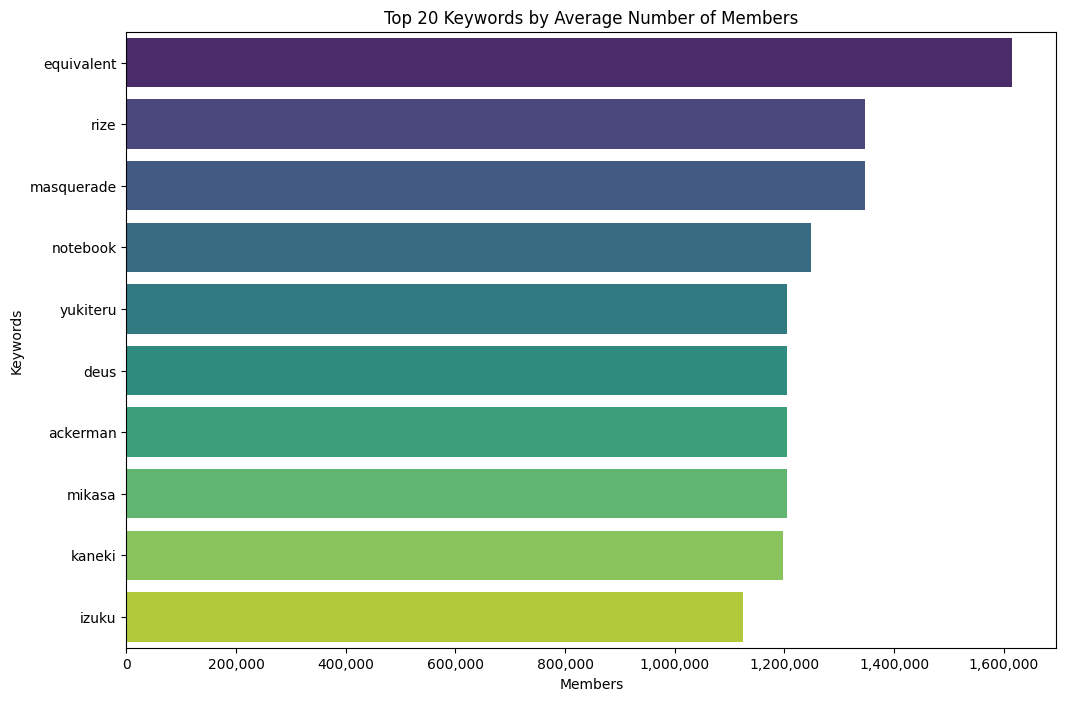

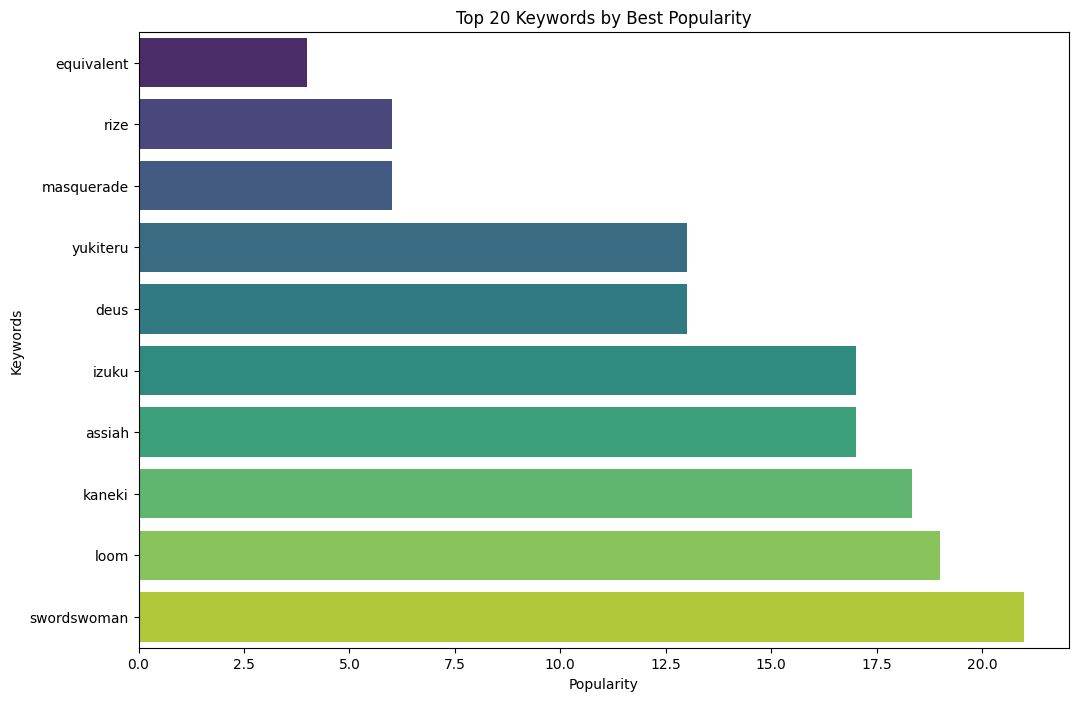

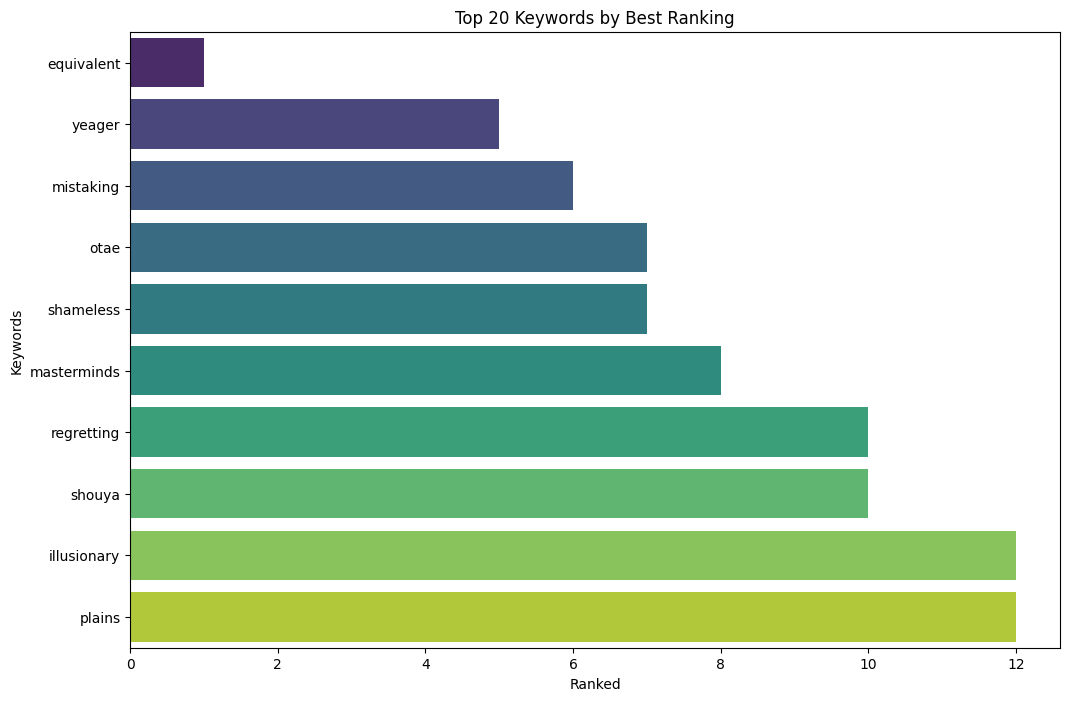

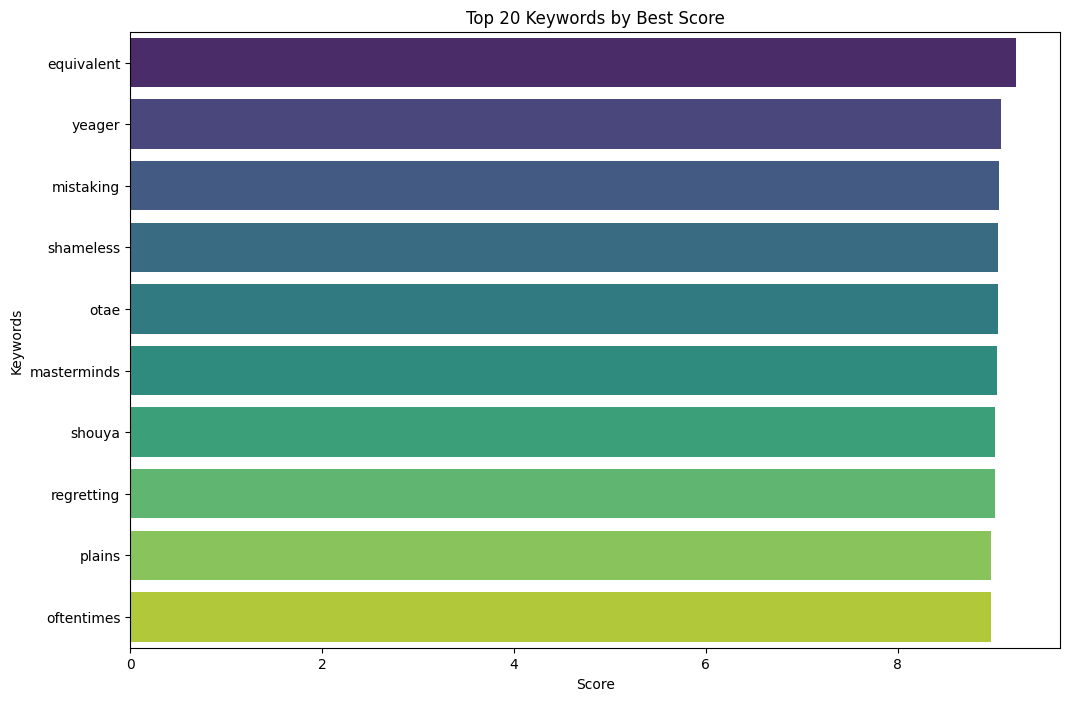

In [35]:
def plot_keyword_metrics(df, metric, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=metric, y='keywords', data=df, palette='viridis', hue='keywords', dodge=False)
    plt.title(title)
    plt.xlabel(metric.capitalize())
    plt.ylabel('Keywords')
    plt.legend([],[], frameon=False)
    if metric == 'members':
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    plt.show()

plot_keyword_metrics(highest_members, 'members', 'Top 20 Keywords by Average Number of Members')
plot_keyword_metrics(best_popularity, 'popularity', 'Top 20 Keywords by Best Popularity')
plot_keyword_metrics(best_ranking, 'ranked', 'Top 20 Keywords by Best Ranking')
plot_keyword_metrics(best_score, 'score', 'Top 20 Keywords by Best Score')    